In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pickle
import numpy as np 

In [2]:
search_range = range(5, 35, 2)
def plot_csp_results(exp):
    with open('results/csp_' + exp + '_tuning.pickle', 'rb') as handle:
        rscores, bscores = pickle.load(handle)
        
    print("CSP - maximal accuracy over 2hz frequency bands : ", max([np.mean(b) for b in bscores]))
    plt.boxplot(bscores)
    plt.xticks(range(len(search_range)),search_range)
    plt.show()

    
    

In [3]:
def plot_psid_results(exp):
    with open('results/psid_' + exp + '_acc.pickle', 'rb') as handle:
        bscores, bscores_f = pickle.load(handle)

    #print(bscores_f[0])
    #fig, axs = plt.subplots(2)

    
    print("PSID - mean accuracy :  ",np.mean(bscores[0]))

    #print("PSID - mean accuracy (filtered data) : ", np.mean(bscores_f[0]))
    plt.boxplot(bscores[0])
    plt.show()
    print("PSID - XGB FEATURE IMPORTANCE")
    
    for i in range(len(bscores[1])):
        plt.imshow(bscores[1][i].reshape((7,20)))
        plt.show()

CSP - maximal accuracy over 2hz frequency bands :  0.6833333333333333


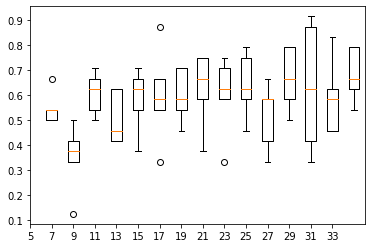

PSID - mean accuracy :   0.9333333333333332


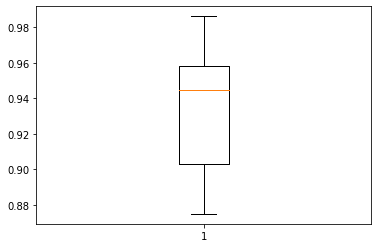

PSID - XGB FEATURE IMPORTANCE


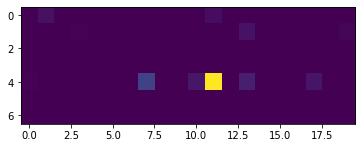

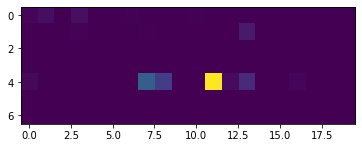

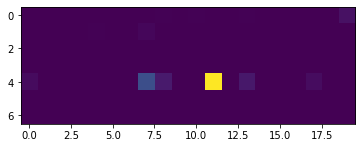

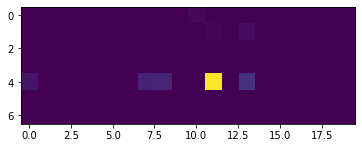

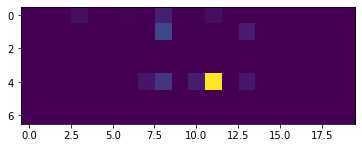

In [4]:
plot_csp_results("1")
plot_psid_results("1")

CSP - maximal accuracy over 2hz frequency bands :  0.7799999999999999


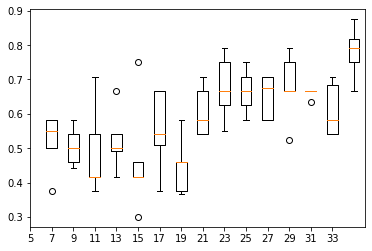

PSID - mean accuracy :   0.9027777777777777
PSID - mean accuracy (filtered data) :  0.8305555555555555


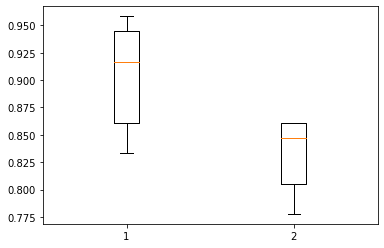

PSID - XGB FEATURE IMPORTANCE


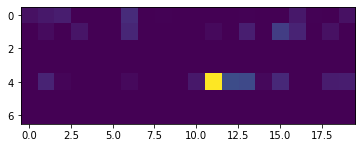

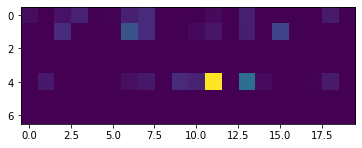

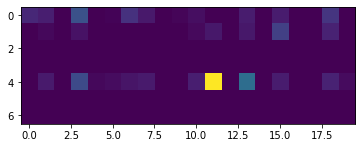

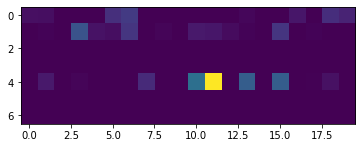

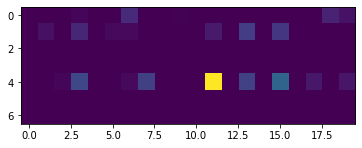

In [67]:
plot_csp_results("2")
plot_psid_results("2")

CSP - maximal accuracy over 2hz frequency bands :  0.638888888888889


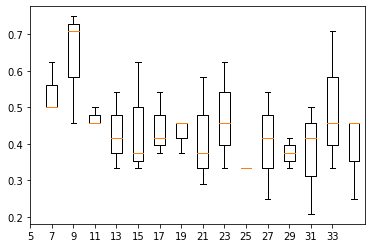

PSID - mean accuracy :   0.8379629629629631
PSID - mean accuracy (filtered data) :  0.773148148148148


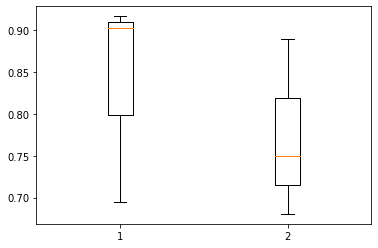

PSID - XGB FEATURE IMPORTANCE


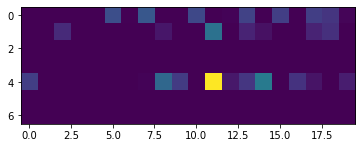

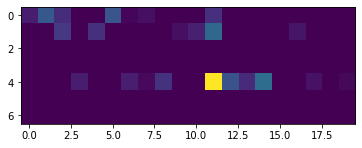

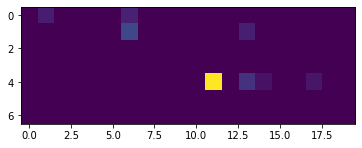

In [68]:
plot_csp_results("3")
plot_psid_results("3")

CSP - maximal accuracy over 2hz frequency bands :  0.6979166666666666


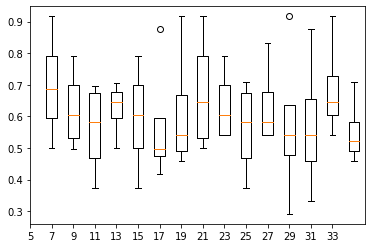

PSID - mean accuracy :   0.9444444444444443
PSID - mean accuracy (filtered data) :  0.9409722222222222


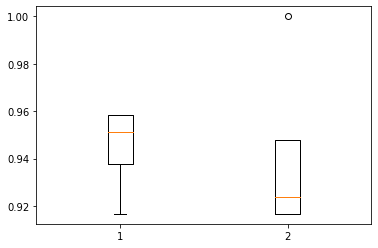

PSID - XGB FEATURE IMPORTANCE


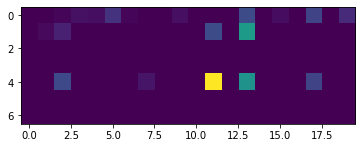

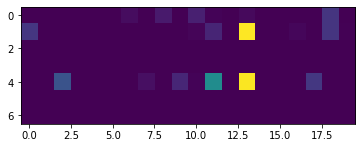

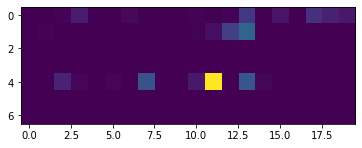

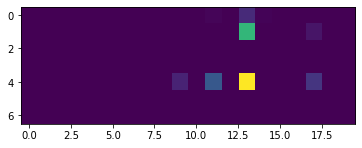

In [69]:
plot_csp_results("4")
plot_psid_results("4")

In [47]:
plot_csp_results("5")
plot_psid_results("5")

FileNotFoundError: [Errno 2] No such file or directory: 'results/csp_5_tuning.pickle'

CSP - maximal accuracy over 2hz frequency bands :  0.8935185185185185


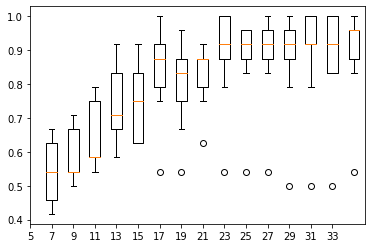

PSID - mean accuracy :   0.9814814814814815
PSID - mean accuracy (filtered data) :  0.9830246913580246


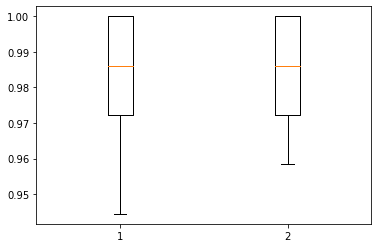

PSID - XGB FEATURE IMPORTANCE


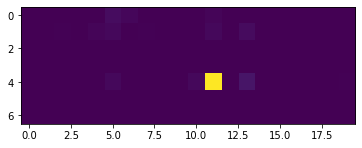

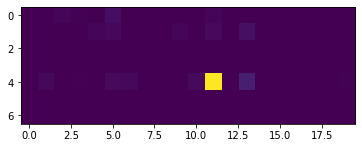

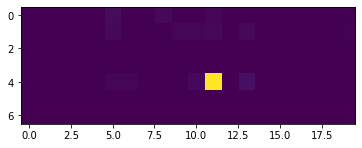

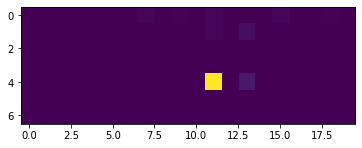

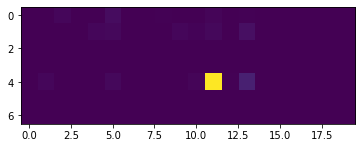

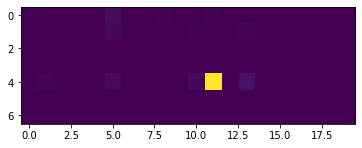

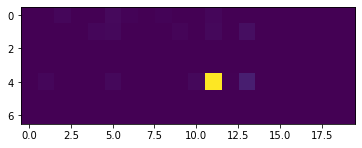

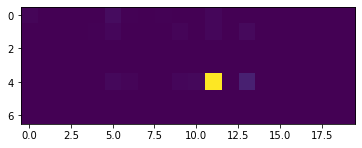

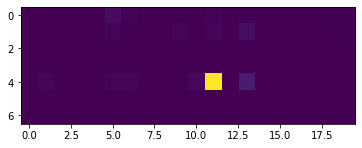

In [70]:
plot_csp_results("6")
plot_psid_results("6")

CSP - maximal accuracy over 2hz frequency bands :  0.6041666666666666


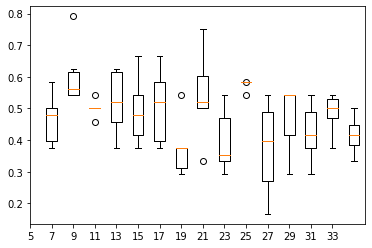

PSID - mean accuracy :   0.9067460317460317
PSID - mean accuracy (filtered data) :  0.8928571428571429


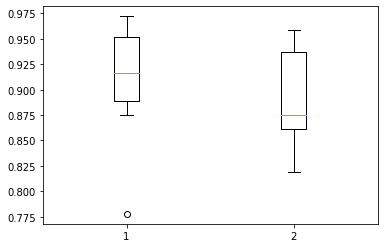

PSID - XGB FEATURE IMPORTANCE


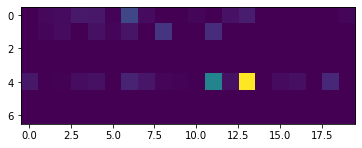

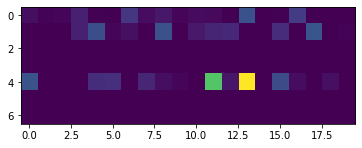

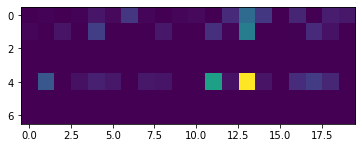

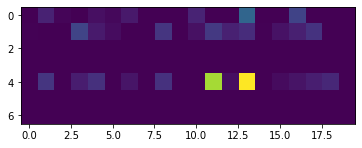

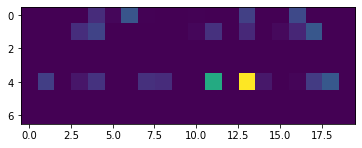

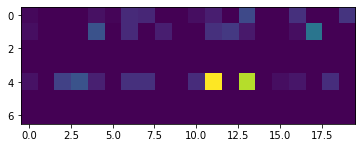

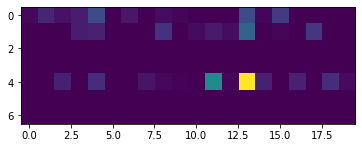

In [71]:
plot_csp_results("7")
plot_psid_results("7")

CSP - maximal accuracy over 2hz frequency bands :  0.5383454106280193


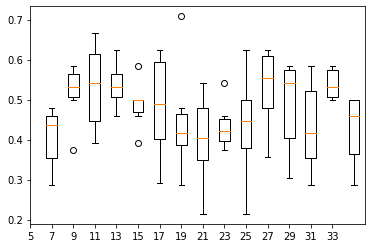

PSID - mean accuracy :   0.8507974848554558


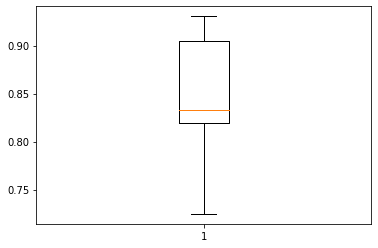

PSID - XGB FEATURE IMPORTANCE


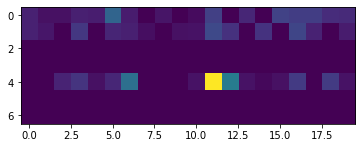

In [7]:
plot_csp_results("8")
plot_psid_results("8")

CSP - maximal accuracy over 2hz frequency bands :  0.5833333333333334


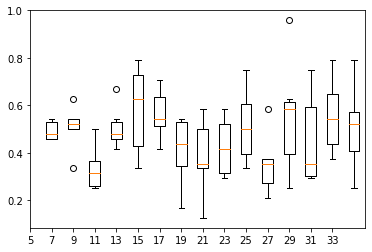

PSID - mean accuracy :   0.8923611111111112


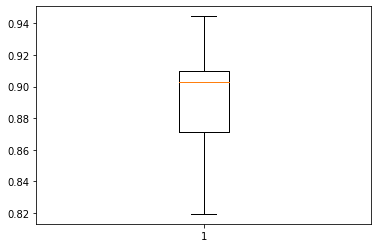

PSID - XGB FEATURE IMPORTANCE


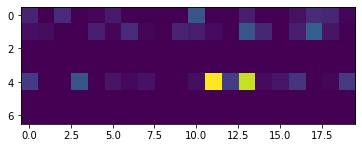

In [8]:
plot_csp_results("9")
plot_psid_results("9")

CSP - maximal accuracy over 2hz frequency bands :  0.5773809523809523


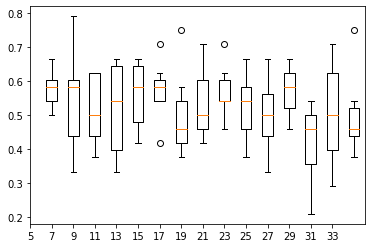

PSID - mean accuracy :   0.9322916666666665


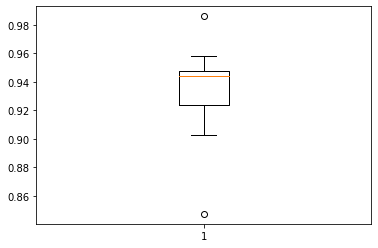

PSID - XGB FEATURE IMPORTANCE


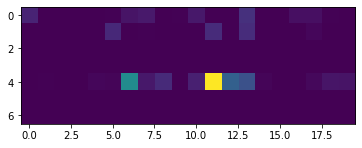

In [9]:
plot_csp_results("10")
plot_psid_results("10")

In [52]:
from utils.utils import block_crossval
exp= "8"
bscores = []
rscores = []

with open('results/csp_'+exp+'.pickle', 'rb') as handle:
    X, y, blocks_idx = pickle.load(handle)

print(X.shape, y.shape)
try:
    rscores.append(random_crossval(X, y, model))
except:
    rscores.append([0])
bscores.append(block_crossval(X, y, model, blocks_idx))

with open('results/psid_' + exp + '_tuning.pickle', 'wb') as handle:
    pickle.dump((rscores, bscores), handle, protocol=pickle.HIGHEST_PROTOCOL)

(636, 140) (636,)
Processing split 1


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [74]:
freq_ranges=[(5, 8), (8, 13), (13, 30)]
freq_nbs=[1, 3, 3]
    # frequency buckets

all_freq_ranges = []
for i_, f in enumerate(freq_ranges):
    points = np.linspace(f[0], f[1], num=freq_nbs[i_] + 1)
    all_freq_ranges += [(points[i_], points[i_ + 1]) for i in range(len(points) - 1)]
print(all_freq_ranges)

[(5.0, 8.0), (9.666666666666666, 11.333333333333334), (9.666666666666666, 11.333333333333334), (9.666666666666666, 11.333333333333334), (24.333333333333336, 30.0), (24.333333333333336, 30.0), (24.333333333333336, 30.0)]


In [ ]:
### Block Crossval Test

In [11]:
sys.path.append("..")
from utils.utils import block_crossval
import xgboost as xgb

with open('results/csp_8.pickle', 'rb') as handle:
    X, y, blocks_idx = pickle.load(handle)
print(X.shape, y.shape)

model = xgb.XGBClassifier(max_depth=5,
                          n_estimators=10,
                          n_jobs=3,
                          eval_metric="logloss",
                          use_label_encoder=False)



(133,) (133,)


In [12]:
from utils.classif_utils import MyLeaveNOut
from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score
def auc_scoring(y, y_pred):
    auc_threshold = np.median(y)
    print(auc_threshold)
    ix_true = np.where(y > auc_threshold)[0]
    y_binary = np.zeros(y.shape)
    y_binary[ix_true] = 1
    score = roc_auc_score(y_binary, y_pred - auc_threshold)
    print()
    return score

In [15]:
X

array([<EpochsArray |  5 events (all good), 0 - 1 sec, baseline off, ~362 kB, data loaded,
        '1': 5>                                                                           ,
       <EpochsArray |  5 events (all good), 0 - 1 sec, baseline off, ~362 kB, data loaded,
        '1': 5>                                                                           ,
       <EpochsArray |  2 events (all good), 0 - 1 sec, baseline off, ~165 kB, data loaded,
        '1': 2>                                                                           ,
       <EpochsArray |  2 events (all good), 0 - 1 sec, baseline off, ~165 kB, data loaded,
        '1': 2>                                                                           ,
       <EpochsArray |  7 events (all good), 0 - 1 sec, baseline off, ~494 kB, data loaded,
        '1': 7>                                                                           ,
       <EpochsArray |  6 events (all good), 0 - 1 sec, baseline off, ~428 kB, data lo

In [14]:
from sklearn.metrics import accuracy_score
leaveNout = MyLeaveNOut()
splits = leaveNout.split(X, y, blocks_idx)
#scorer = make_scorer(auc_scoring)
scorer = make_scorer(accuracy_score)
scores = []
feature_imp = []

for isplit, (ix_train, ix_test) in enumerate(splits):
    print("=" * 80)
    print(f"Processing split {isplit + 1}")

    model.fit(X[ix_train], y[ix_train])
    print(y[ix_test])
    score = scorer(model, X[ix_test], y[ix_test])
    #y_pred = model.predict(X[ix_test])
    #score = accuracy_score(y[ix_test],y_pred)
    scores.append(score)

Processing split 1


ValueError: Please reshape the input data into 2-dimensional matrix.

In [57]:
scores

[0.7246376811594203,
 0.8333333333333334,
 0.8333333333333334,
 0.9305555555555556,
 0.7916666666666666,
 0.8194444444444444,
 0.9166666666666666,
 0.9027777777777778,
 0.9047619047619048]